# <b>Abstract</b>

Beam Search is a search algorithm used in natural language processing and machine learning to generate sequences of text or make decisions. Beam Search has the ability to concurrently explore multiple potential paths or sequences.In essence, beam search helps generate text that's more coherent and contextually relevant by considering multiple possibilities and selecting the most promising ones as it progresses.

The primary objective of this study is to evaluate and contrast the response time and memory usage of output text generation when Beam Search is used versus using default search.

Our emphasis will be on two key domains :
1. Text generation
2. Machine translation

For text generation, we will employ three distinct models GPT-2, DistilGPT-2, and BART from the HuggingSpace Transformers library. Each model will be given some input texts and both Beam Search and default search will be compared for text generation and the response time, as well as the memory usage will be recorded and compared.

For machine translation, MarianMT, a machine translation framework is used for the translation. We will be translating text from English to three different languages, French, Bahasa Indonesia and Chinese. Each language will be translated using both Beam search and default search and the response time, as well as the memory usage will be recorded and compared.

We will do three tests of using beam search for both text generation and machine learning. Specifically, the experiment will encompass three distinct scenarios utilizing 2, 7, and 25 beams, respectively to make the correlation between an increased number of beams and its consequential impact on both memory utilization and processing time

# <b>Methodology</b>

# <b>Results</b>

# <b>Conclusion</b>

# <b>Install Necessary Libraries</b>
Please run this cell first before running all other sections

In [1]:
!pip install transformers
!pip install SentencePiece
!pip install memory-profiler

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.1/311.1 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 8.4 MB/s eta 0:00:00


# <b>Text Generation with GPT-2</b>

<h3><b>Check Initial available memory</b><h3>

In [2]:
import psutil

# Get available memory in bytes
available_memory = psutil.virtual_memory().available

# Convert bytes to megabytes for readability
available_memory_mb = available_memory / (1024 ** 2)

print(f"Initial Available Memory: {available_memory_mb:.2f} MB")

Initial Available Memory: 11776.82 MB


<h3><b>Define the model and prompt</b><h3>

In [3]:
import time
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from memory_profiler import memory_usage

model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

input_text = "Hello, my dog is cute and"
input_ids = tokenizer(input_text, return_tensors="pt").input_ids

<h3><b>Text generation with GPT-2 using two beams</b><h3>

In [4]:
import time
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from memory_profiler import memory_usage

# Function for text generation with one beam search
def generate_text_gpt2_twoBeam():
    output = model.generate(input_ids, max_length=100, num_beams=2,no_repeat_ngram_size=2,early_stopping=True)
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text

# Testing for text generation using gpt2 model with one beam
# Measure response time
start_time = time.time()
# Generate text using beam search
generated_text_gpt2_twoBeam = generate_text_gpt2_twoBeam()
end_time = time.time()
response_time_gpt2_twoBeam = end_time - start_time
# Measure memory usage
memory_used_gpt2_twoBeam = memory_usage(generate_text_gpt2_twoBeam)

# Print results for text generation with gpt2 model using one beam
print("Generated Text (GPT-2 with Beam Search using two beam):", generated_text_gpt2_twoBeam)
print(f"Response Time: {response_time_gpt2_twoBeam:.2f} seconds")
print(f"Memory Usage: {max(memory_used_gpt2_twoBeam):.2f} MB")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text (GPT-2 with Beam Search using two beam): Hello, my dog is cute and I love him. I'm not sure if he's a good dog, but I think he has a lot of personality. He's very outgoing and he loves to play with his friends.

"I'm a big fan of his, and it's nice to have him around. It's been a long time since I've had a dog that I didn't like, so I just wanted to give him a chance to grow up and have a happy life
Response Time: 17.10 seconds
Memory Usage: 1088.73 MB


<h3><b>Text generation with GPT-2 using seven beams</b><h3>

In [5]:
import time
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from memory_profiler import memory_usage

# Function for text generation with seven beam search
def generate_text_gpt2_sevenBeam():
    output = model.generate(input_ids, max_length=100, num_beams=7,no_repeat_ngram_size=2, early_stopping=True)
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text

# Testing for text generation using gpt2 model with seven beams
# Measure response time
start_time = time.time()
# Generate text using beam search
generated_text_gpt2_sevenBeam = generate_text_gpt2_sevenBeam()
end_time = time.time()
response_time_gpt2_sevenBeam = end_time - start_time
# Measure memory usage
memory_used_gpt2_sevenBeam = memory_usage(generate_text_gpt2_sevenBeam)

# Print results for text generation with gpt2 model using three beam
print("Generated Text (GPT-2 with Beam Search using seven beams):", generated_text_gpt2_sevenBeam)
print(f"Response Time: {response_time_gpt2_sevenBeam:.2f} seconds")
print(f"Memory Usage: {max(memory_used_gpt2_sevenBeam):.2f} MB")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text (GPT-2 with Beam Search using seven beams): Hello, my dog is cute and I love him so much. I'm so happy to have him back.

Thank you for taking the time out of your busy schedule to let me know what you think of my blog. It's been a long time coming, but I hope you enjoy it as much as I do.
Response Time: 17.26 seconds
Memory Usage: 1156.76 MB


<h3><b>Text generation with GPT-2 using twenty-five beams</b><h3>

In [6]:
import time
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from memory_profiler import memory_usage

# Function for text generation with twenty-five beam search
def generate_text_gpt2_twentyFiveBeam():
    output = model.generate(input_ids, max_length=100, num_beams=25,no_repeat_ngram_size=2, early_stopping=True)
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text

# Testing for text generation using gpt2 model with twenty-five beams
# Measure response time
start_time = time.time()
# Generate text using beam search
generated_text_gpt2_twentyFiveBeam = generate_text_gpt2_twentyFiveBeam()
end_time = time.time()
response_time_gpt2_twentyFiveBeam = end_time - start_time
# Measure memory usage
memory_used_gpt2_twentyFiveBeam = memory_usage(generate_text_gpt2_twentyFiveBeam)

# Print results for text generation with gpt2 model using five beam
print("Generated Text (GPT-2 with Beam Search using twenty-five beams):", generated_text_gpt2_twentyFiveBeam)
print(f"Response Time: {response_time_gpt2_twentyFiveBeam:.2f} seconds")
print(f"Memory Usage: {max(memory_used_gpt2_twentyFiveBeam):.2f} MB")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text (GPT-2 with Beam Search using twenty-five beams): Hello, my dog is cute and I can't wait to see what she has in store for me in the future.

Thank you for reading. Please take a moment to follow me on Twitter – @lastwordBkerr, or find her on Facebook.


Interested in writing for LastWordOnSports? If so, check out our "Join Our Team" page to find out how.
Response Time: 23.64 seconds
Memory Usage: 1638.77 MB


<h3><b>Text generation with GPT-2 using normal search</b><h3>

In [7]:
import time
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from memory_profiler import memory_usage

# Define the model and tokenizer
model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

# Input text
input_text = "Hello, my dog is cute and"

# Tokenize the input text
input_ids = tokenizer.encode(input_text, return_tensors="pt")

def generate_text_gpt2_normalSearch():
    output = model.generate(input_ids,no_repeat_ngram_size=2,max_length=100)
    generated_text_normal = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text_normal

# Testing for text generation using gpt2 model with normal search
# Measure response time
start_time = time.time()
# Generate text using beam search
generated_text_gpt2_normalSearch = generate_text_gpt2_normalSearch()
end_time = time.time()
response_time_gpt2_normalSearch = end_time - start_time
# Measure memory usage
memory_used_gpt2_normalSearch = memory_usage(generate_text_gpt2_normalSearch)

# Print results for text generation with gpt2 model using normal search
print("Generated Text (GPT-2 using normal search):", generated_text_gpt2_normalSearch)
print(f"Response Time: {response_time_gpt2_normalSearch:.2f} seconds")
print(f"Memory Usage: {max(memory_used_gpt2_normalSearch):.2f} MB")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text (GPT-2 using normal search): Hello, my dog is cute and I love him. I'm not sure if he's a good dog, but I think he is a great dog. He's very friendly and he loves to play with me.

I'm a big fan of the dog and his personality. His personality is very positive and very happy. It's nice to see him in a situation where he can be a little bit more relaxed. The dog has a very good sense of humor and is always smiling. When
Response Time: 6.40 seconds
Memory Usage: 1429.86 MB


# <b>Text Generation with DistilGPT-2</b>

<h3><b>Text generation with DistilGPT-2 using two beams</b><h3>

In [8]:
import time
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from memory_profiler import memory_usage

# Load the pre-trained DistilGPT-2 model and tokenizer
model_name = "distilgpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

# Input text
input_text = "Hello, my dog is cute and"

# Tokenize the input text
input_ids = tokenizer.encode(input_text, return_tensors="pt")

# Function for text generation with twenty-five beam search
def generate_text_distilgpt2_twoBeam():
    output = model.generate(
    input_ids,
    max_length=100,
    num_beams=2,  # Number of beams for beam search
    length_penalty=2.0,
    no_repeat_ngram_size=2,
    early_stopping=True
    )
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text


# Testing for text generation using DistilGPT-2 model model with two beams
# Measure response time
start_time = time.time()
# Generate text using beam search
generated_text_distilgpt2_twoBeam = generate_text_distilgpt2_twoBeam()
end_time = time.time()
response_time_distilgpt2_twoBeam = end_time - start_time
# Measure memory usage
memory_used_distilgpt2_twoBeam = memory_usage(generate_text_distilgpt2_twoBeam)

# Print results for text generation with gpt2 model using normal search
print("Generated Text (DistilGPT-2 with Beam Search using two beams):", generated_text_distilgpt2_twoBeam)
print(f"Response Time: {response_time_distilgpt2_twoBeam:.2f} seconds")
print(f"Memory Usage: {max(memory_used_distilgpt2_twoBeam):.2f} MB")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text (DistilGPT-2 with Beam Search using two beams): Hello, my dog is cute and I love him.

I love her and she loves me too. She is so cute, I can't wait to see her again.
Response Time: 2.50 seconds
Memory Usage: 1253.41 MB


<h3><b>Text generation with DistilGPT-2 using seven beams</b><h3>

In [9]:
import time
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from memory_profiler import memory_usage

# Load the pre-trained DistilGPT-2 model and tokenizer
model_name = "distilgpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

# Input text
input_text = "Hello, my dog is cute and"

# Tokenize the input text
input_ids = tokenizer.encode(input_text, return_tensors="pt")

# Function for text generation with twenty-five beam search
def generate_text_distilgpt2_sevenBeam():
    output = model.generate(
    input_ids,
    max_length=100,
    num_beams=7,  # Number of beams for beam search
    length_penalty=2.0,
    no_repeat_ngram_size=2,
    early_stopping=True
    )
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text


# Testing for text generation using DistilGPT-2 model model with seven beams
# Measure response time
start_time = time.time()
# Generate text using beam search
generated_text_distilgpt2_sevenBeam = generate_text_distilgpt2_sevenBeam()
end_time = time.time()
response_time_distilgpt2_sevenBeam = end_time - start_time
# Measure memory usage
memory_used_distilgpt2_sevenBeam = memory_usage(generate_text_distilgpt2_sevenBeam)

# Print results for text generation with gpt2 model using normal search
print("Generated Text (DistilGPT-2 with Beam Search using seven beams):", generated_text_distilgpt2_sevenBeam)
print(f"Response Time: {response_time_distilgpt2_sevenBeam:.2f} seconds")
print(f"Memory Usage: {max(memory_used_distilgpt2_sevenBeam):.2f} MB")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text (DistilGPT-2 with Beam Search using seven beams): Hello, my dog is cute and I love to play with it, but I don't know what to do about it. I'm not sure if I'll be able to make it to the next level, or if it will take me a long time to get to that level.

If you have any questions, please let me know in the comments.
Response Time: 7.39 seconds
Memory Usage: 1300.39 MB


<h3><b>Text generation with DistilGPT-2 using twenty-five beams</b><h3>

In [10]:
import time
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from memory_profiler import memory_usage

# Load the pre-trained DistilGPT-2 model and tokenizer
model_name = "distilgpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

# Input text
input_text = "Hello, my dog is cute and"

# Tokenize the input text
input_ids = tokenizer.encode(input_text, return_tensors="pt")

# Function for text generation with twenty-five beam search
def generate_text_distilgpt2_twentyFiveBeam():
    output = model.generate(
    input_ids,
    max_length=100,
    num_beams=25,  # Number of beams for beam search
    length_penalty=2.0,
    no_repeat_ngram_size=2,
    early_stopping=True
    )
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text


# Testing for text generation using DistilGPT-2 model model with twenty five beams
# Measure response time
start_time = time.time()
# Generate text using beam search
generated_text_distilgpt2_twentyFiveBeam = generate_text_distilgpt2_twentyFiveBeam()
end_time = time.time()
response_time_distilgpt2_twentyFiveBeam = end_time - start_time
# Measure memory usage
memory_used_distilgpt2_twentyFiveBeam = memory_usage(generate_text_distilgpt2_twentyFiveBeam)

# Print results for text generation with gpt2 model using normal search
print("Generated Text (DistilGPT-2 with Beam Search using twenty-five beams):", generated_text_distilgpt2_twentyFiveBeam)
print(f"Response Time: {response_time_distilgpt2_twentyFiveBeam:.2f} seconds")
print(f"Memory Usage: {max(memory_used_distilgpt2_twentyFiveBeam):.2f} MB")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text (DistilGPT-2 with Beam Search using twenty-five beams): Hello, my dog is cute and I love to play with it, but I don't know what to do about it. I'm not sure if I'll be able to give it a try.

If you have any questions, please let me know in the comments below.
Response Time: 8.97 seconds
Memory Usage: 1262.12 MB


<h3><b>Text generation with DistilGPT-2 using normal search</b><h3>

In [11]:
import time
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from memory_profiler import memory_usage

# Define the model and tokenizer
model_name = "distilgpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

# Input text
input_text = "Hello, my dog is cute and"

# Tokenize the input text
input_ids = tokenizer.encode(input_text, return_tensors="pt")

def generate_text_distilgpt2_normalSearch():
    output = model.generate(input_ids,no_repeat_ngram_size=2,max_length=100)
    generated_text_normal = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text_normal

# Testing for text generation using distilgpt2 model with normal search
# Measure response time
start_time = time.time()
# Generate text using beam search
generated_text_distilgpt2_normalSearch = generate_text_distilgpt2_normalSearch()
end_time = time.time()
response_time_distilgpt2_normalSearch = end_time - start_time
# Measure memory usage
memory_used_distilgpt2_normalSearch = memory_usage(generate_text_distilgpt2_normalSearch)

# Print results for text generation with gpt2 model using normal search
print("Generated Text (distilgpt2 using normal search):", generated_text_distilgpt2_normalSearch)
print(f"Response Time: {response_time_distilgpt2_normalSearch:.2f} seconds")
print(f"Memory Usage: {max(memory_used_distilgpt2_normalSearch):.2f} MB")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text (distilgpt2 using normal search): Hello, my dog is cute and I love him. I'm so happy to have him, and he's so cute.

I love you.
Response Time: 0.89 seconds
Memory Usage: 1159.23 MB


<h3><b>Display response time and memory usage of DistilGPT-2 text generation on bar graphs</b><h3>

# <b>Text Generation with BART</b>

<h3><b>Text generation with BART using two beams</b><h3>

In [12]:
import time
from transformers import BartTokenizer, BartForConditionalGeneration
from memory_profiler import memory_usage

# Load BART model and tokenizer
tokenizer = BartTokenizer.from_pretrained("facebook/bart-large-cnn")
model = BartForConditionalGeneration.from_pretrained("facebook/bart-large-cnn")

# Set the prompt for text generation
prompt = "Hello, my dog is cute and"

# Tokenize the input text
input_ids = tokenizer.encode(prompt, return_tensors="pt", add_special_tokens=True)

# Function for text generation with two beam search
def generate_text_bart_twoBeam():
  # Generate text using beam search
    output = model.generate(
        input_ids,
        max_length=100,
        num_beams=2,
        no_repeat_ngram_size=2,
        early_stopping=True,
    )
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text


# Testing for text generation using BART model with two beams
# Measure response time
start_time = time.time()
# Generate text using beam search
generated_text_bart_twoBeam = generate_text_bart_twoBeam()
end_time = time.time()
response_time_bart_twoBeam = end_time - start_time
# Measure memory usage
memory_used_bart_twoBeam = memory_usage(generate_text_bart_twoBeam)

# Print results for text generation with gpt2 model using five beam
print("Generated Text (BART with Beam Search using two beams):", generated_text_bart_twoBeam)
print(f"Response Time: {response_time_bart_twoBeam:.2f} seconds")
print(f"Memory Usage: {max(memory_used_bart_twoBeam):.2f} MB")

Generated Text (BART with Beam Search using two beams): Hello, my dog is cute and cute. Hello, I have a dog that is also cute, and a little bit weird. hello, My dog, is adorable and weird and kind of weird, too. Hey, it's a puppy. What do you say to that?
Response Time: 10.81 seconds
Memory Usage: 3696.82 MB


<h3><b>Text generation with BART using seven beams</b><h3>

In [13]:
import time
from transformers import BartTokenizer, BartForConditionalGeneration
from memory_profiler import memory_usage

# Load BART model and tokenizer
tokenizer = BartTokenizer.from_pretrained("facebook/bart-large-cnn")
model = BartForConditionalGeneration.from_pretrained("facebook/bart-large-cnn")

# Set the prompt for text generation
prompt = "Hello, my dog is cute and"

# Tokenize the input text
input_ids = tokenizer.encode(prompt, return_tensors="pt", add_special_tokens=True)

# Function for text generation with two beam search
def generate_text_bart_sevenBeam():
  # Generate text using beam search
    output = model.generate(
        input_ids,
        max_length=100,
        num_beams=7,
        no_repeat_ngram_size=2,
        early_stopping=True,
    )
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text


# Testing for text generation using BART model with seven beams
# Measure response time
start_time = time.time()
# Generate text using beam search
generated_text_bart_sevenBeam = generate_text_bart_sevenBeam()
end_time = time.time()
response_time_bart_sevenBeam = end_time - start_time
# Measure memory usage
memory_used_bart_sevenBeam = memory_usage(generate_text_bart_sevenBeam)

# Print results for text generation with gpt2 model using five beam
print("Generated Text (BART with Beam Search using seven beams):", generated_text_bart_sevenBeam)
print(f"Response Time: {response_time_bart_sevenBeam:.2f} seconds")
print(f"Memory Usage: {max(memory_used_bart_sevenBeam):.2f} MB")

Generated Text (BART with Beam Search using seven beams): Hello, my dog is cute and I love him. Here's how you can get your own dog. Visit CNN.com/soulmatestories to see more videos from CNN's "Soulmatistry" series. Follow us on Twitter @CNNOpinion and @MailOnlinePics.
Response Time: 17.28 seconds
Memory Usage: 5081.90 MB


<h3><b>Text generation with BART using twenty-five beams</b><h3>

In [14]:
import time
from transformers import BartTokenizer, BartForConditionalGeneration
from memory_profiler import memory_usage

# Load BART model and tokenizer
tokenizer = BartTokenizer.from_pretrained("facebook/bart-large-cnn")
model = BartForConditionalGeneration.from_pretrained("facebook/bart-large-cnn")

# Set the prompt for text generation
prompt = "Hello, my dog is cute and"

# Tokenize the input text
input_ids = tokenizer.encode(prompt, return_tensors="pt", add_special_tokens=True)

# Function for text generation with two beam search
def generate_text_bart_twentyFiveBeam():
  # Generate text using beam search
    output = model.generate(
        input_ids,
        max_length=100,
        num_beams=25,
        no_repeat_ngram_size=2,
        early_stopping=True,
    )
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text


# Testing for text generation using BART model with twentyFive beams
# Measure response time
start_time = time.time()
# Generate text using beam search
generated_text_bart_twentyFiveBeam = generate_text_bart_twentyFiveBeam()
end_time = time.time()
response_time_bart_twentyFiveBeam = end_time - start_time
# Measure memory usage
memory_used_bart_twentyFiveBeam = memory_usage(generate_text_bart_twentyFiveBeam)

# Print results for text generation with gpt2 model using twenty five beam
print("Generated Text (BART with Beam Search using twentyFive beams):", generated_text_bart_twentyFiveBeam)
print(f"Response Time: {response_time_bart_twentyFiveBeam:.2f} seconds")
print(f"Memory Usage: {max(memory_used_bart_twentyFiveBeam):.2f} MB")

Generated Text (BART with Beam Search using twentyFive beams): Hello, my dog is cute and I love him. Here's how you can get your own dog. Have you ever had a dog? Share your story with CNN iReport. Send photos and videos of your dog to jennifer.smith@dailymail.co.uk.
Response Time: 27.68 seconds
Memory Usage: 5087.56 MB


<h3><b>Text generation with BART using normal search</b><h3>

In [15]:
import time
from transformers import BartTokenizer, BartForConditionalGeneration
from memory_profiler import memory_usage

# Load BART model and tokenizer
tokenizer = BartTokenizer.from_pretrained("facebook/bart-large-cnn")
model = BartForConditionalGeneration.from_pretrained("facebook/bart-large-cnn")

# Set the prompt for text generation
prompt = "Hello, my dog is cute and"

# Tokenize the input text
input_ids = tokenizer.encode(prompt, return_tensors="pt", add_special_tokens=True)

# Function for text generation with two beam search
def generate_text_bart_normalSearch():
  # Generate text using normal search
    output = model.generate(
        input_ids,
        max_length=100,
        num_beams=1, # Set to 1 for greedy (normal) search
        no_repeat_ngram_size=2
    )
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text


# Testing for text generation using BART model with normal search
# Measure response time
start_time = time.time()
# Generate text using beam search
generated_text_bart_normalSearch = generate_text_bart_normalSearch()
end_time = time.time()
response_time_bart_normalSearch = end_time - start_time
# Measure memory usage
memory_used_bart_normalSearch = memory_usage(generate_text_bart_normalSearch)

# Print results for text generation with gpt2 model using twenty five beam
print("Generated Text (BART with Beam Search using normal search):", generated_text_bart_normalSearch)
print(f"Response Time: {response_time_bart_normalSearch:.2f} seconds")
print(f"Memory Usage: {max(memory_used_bart_normalSearch):.2f} MB")

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:418: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:437: UserWarning: `num_beams` is set to 1. However, `length_penalty` is set to `2.0` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `length_penalty`.
  warnings.warn(


Generated Text (BART with Beam Search using normal search): Hello, my dog is cute and cute. Hello, I'm a dog.Hello. My dog's cute, cute! Hello. I’m adog. hello, your dog”s cute,. cute? Hello! Your dog, is adorable. Please.
Response Time: 10.50 seconds
Memory Usage: 5291.60 MB


# <b>Response Time and Memory Usage Of Text Generation using GPT-2,DistilGPT-2 and BART on bar graphs</b>

<h3><b>GPT-2 Results</b><h3>

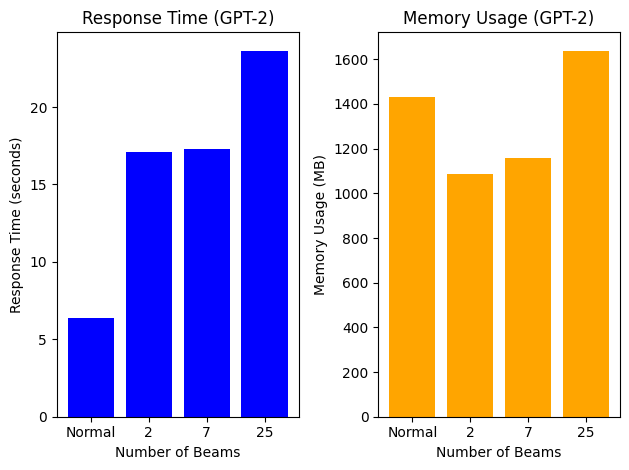

6.399419546127319
17.098191261291504
17.2627215385437
23.640252828598022

1429.86
1088.73
1156.76
1638.77


In [41]:
import matplotlib.pyplot as plt

# put the memory usage of using one beam to float variable
gpt2_m2 = float(f"{max(memory_used_gpt2_twoBeam):.2f}")

# put the memory usage of using seven beams to float variable
gpt2_m7 = float(f"{max(memory_used_gpt2_sevenBeam):.2f}")

# put the memory usage of using twenty-five beam to float variable
gpt2_m25 = float(f"{max(memory_used_gpt2_twentyFiveBeam):.2f}")

# put the memory usage of normal search to float variable
gpt2_mNormal = float(f"{max(memory_used_gpt2_normalSearch):.2f}")

# Sample data for the first graph
num_beams_1 = ["Normal","2","7","25"]
response_time = [response_time_gpt2_normalSearch,response_time_gpt2_twoBeam,response_time_gpt2_sevenBeam,response_time_gpt2_twentyFiveBeam]  # in seconds

# Sample data for the second graph
num_beams_2 = ["Normal","2","7","25"]
memory_usage = [gpt2_mNormal,gpt2_m2,gpt2_m7,gpt2_m25]  # in mb

# Create two subplots side by side
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.bar(num_beams_1, response_time, color='blue')
plt.xlabel('Number of Beams')
plt.ylabel('Response Time (seconds)')
plt.title('Response Time (GPT-2)')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.bar(num_beams_2, memory_usage, color='orange')
plt.xlabel('Number of Beams')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage (GPT-2)')

# Adjust layout for better visualization
plt.tight_layout()

# Display the graphs
plt.show()

print(response_time_gpt2_normalSearch)
print(response_time_gpt2_twoBeam)
print(response_time_gpt2_sevenBeam)
print(response_time_gpt2_twentyFiveBeam)

print("")

print(gpt2_mNormal)
print(gpt2_m2)
print(gpt2_m7)
print(gpt2_m25)

<h3><b>DistilGPT-2 Results</b><h3>

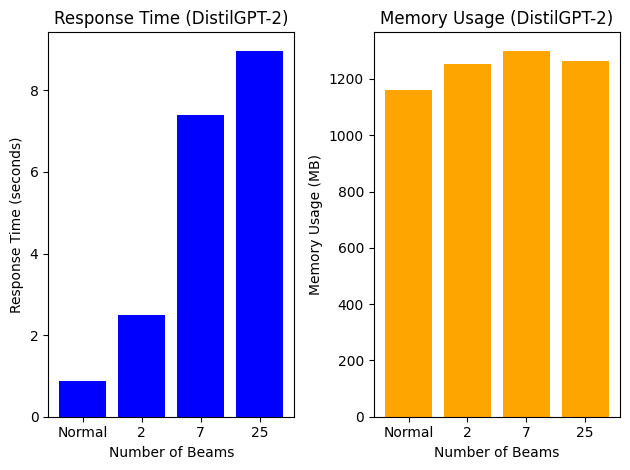

0.886833906173706
2.499535322189331
7.385347604751587
8.971543550491333

1159.23
1253.41
1300.39
1262.12


In [43]:
import matplotlib.pyplot as plt

# put the memory usage of using one beam to float variable
distilgpt2_m2 = float(f"{max(memory_used_distilgpt2_twoBeam):.2f}")

# put the memory usage of using seven beams to float variable
distilgpt2_m7 = float(f"{max(memory_used_distilgpt2_sevenBeam):.2f}")

# put the memory usage of using twenty-five beam to float variable
distilgpt2_m25 = float(f"{max(memory_used_distilgpt2_twentyFiveBeam):.2f}")

# put the memory usage of normal search to float variable
distilgpt2_mNormal = float(f"{max(memory_used_distilgpt2_normalSearch):.2f}")

# Sample data for the first graph
num_beams_1 = ["Normal","2","7","25"]
response_time = [response_time_distilgpt2_normalSearch,response_time_distilgpt2_twoBeam,response_time_distilgpt2_sevenBeam,response_time_distilgpt2_twentyFiveBeam]  # in seconds

# Sample data for the second graph
num_beams_2 = ["Normal","2","7","25"]
memory_usage = [distilgpt2_mNormal,distilgpt2_m2,distilgpt2_m7,distilgpt2_m25]  # in mb

# Create two subplots side by side
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.bar(num_beams_1, response_time, color='blue')
plt.xlabel('Number of Beams')
plt.ylabel('Response Time (seconds)')
plt.title('Response Time (DistilGPT-2)')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.bar(num_beams_2, memory_usage, color='orange')
plt.xlabel('Number of Beams')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage (DistilGPT-2)')

# Adjust layout for better visualization
plt.tight_layout()

# Display the graphs
plt.show()

print(response_time_distilgpt2_normalSearch)
print(response_time_distilgpt2_twoBeam)
print(response_time_distilgpt2_sevenBeam)
print(response_time_distilgpt2_twentyFiveBeam)

print("")

print(distilgpt2_mNormal)
print(distilgpt2_m2)
print(distilgpt2_m7)
print(distilgpt2_m25)

<h3><b>BART Results</b><h3>

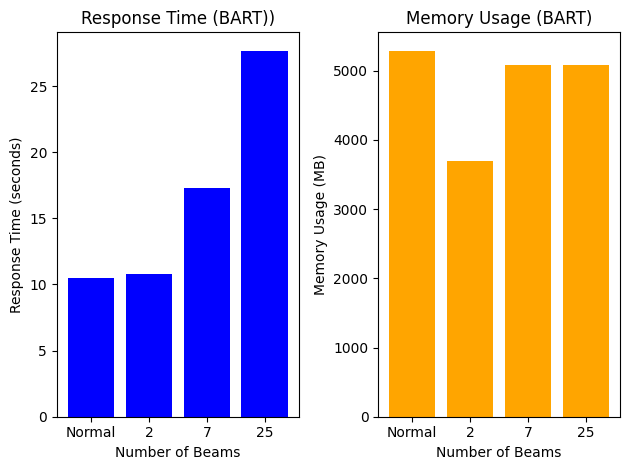

10.495377779006958
10.812625408172607
17.281408071517944
27.683307886123657

5291.6
3696.82
5081.9
5087.56


In [46]:
import matplotlib.pyplot as plt

# put the memory usage of using one beam to float variable
bart_m2 = float(f"{max(memory_used_bart_twoBeam):.2f}")

# put the memory usage of using seven beams to float variable
bart_m7 = float(f"{max(memory_used_bart_sevenBeam):.2f}")

# put the memory usage of using twenty-five beam to float variable
bart_m25 = float(f"{max(memory_used_bart_twentyFiveBeam):.2f}")

# put the memory usage of normal search to float variable
bart_mNormal = float(f"{max(memory_used_bart_normalSearch):.2f}")

# Sample data for the first graph
num_beams_1 = ["Normal","2","7","25"]
response_time = [response_time_bart_normalSearch,response_time_bart_twoBeam,response_time_bart_sevenBeam,response_time_bart_twentyFiveBeam]  # in seconds

# Sample data for the second graph
num_beams_2 = ["Normal","2","7","25"]
memory_usage = [bart_mNormal,bart_m2,bart_m7,bart_m25]  # in mb

# Create two subplots side by side
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.bar(num_beams_1, response_time, color='blue')
plt.xlabel('Number of Beams')
plt.ylabel('Response Time (seconds)')
plt.title('Response Time (BART))')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.bar(num_beams_2, memory_usage, color='orange')
plt.xlabel('Number of Beams')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage (BART)')

# Adjust layout for better visualization
plt.tight_layout()

# Display the graphs
plt.show()

print(response_time_bart_normalSearch)
print(response_time_bart_twoBeam)
print(response_time_bart_sevenBeam)
print(response_time_bart_twentyFiveBeam)

print("")
print(bart_mNormal)
print(bart_m2)
print(bart_m7)
print(bart_m25)

<h3><b>Comparison of Response Time for Normal, 2 , 7 and 25 beam search for each model type</b><h3>

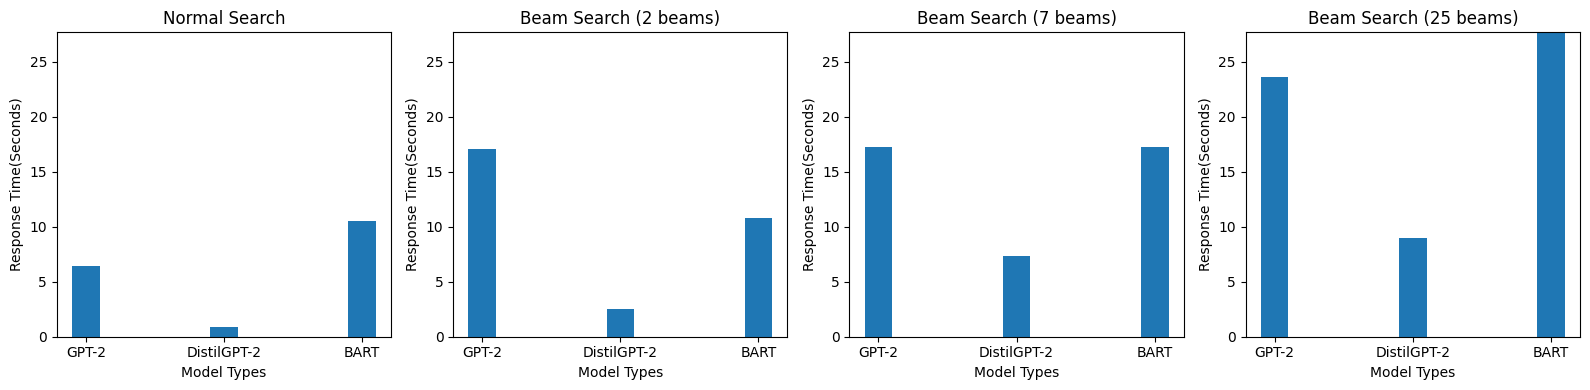

Response Time for GPT2 normal search: 6.399419546127319 seconds
Response Time for DistilGPT2 normal search: 0.886833906173706 seconds
Response Time for BART normal search: 10.495377779006958 seconds

Response Time for GPT2 two beam search: 17.098191261291504 seconds
Response Time for DistilGPT2 two beam search: 2.499535322189331 seconds
Response Time for BART two beam search: 10.812625408172607 seconds

Response Time for GPT2 seven beam search: 17.2627215385437 seconds
Response Time for DistilGPT2 seven beam search: 7.385347604751587 seconds
Response Time for BART seven beam search: 17.281408071517944 seconds

Response Time for GPT2 twenty five beam search: 23.640252828598022 seconds
Response Time for DistilGPT2 twenty five beam search: 8.971543550491333 seconds
Response Time for BART twenty five beam search: 27.683307886123657 seconds


In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for demonstration
model_types = ['GPT-2', 'DistilGPT-2', 'BART']
values = np.array([[response_time_gpt2_normalSearch, response_time_gpt2_twoBeam, response_time_gpt2_sevenBeam, response_time_gpt2_twentyFiveBeam], [response_time_distilgpt2_normalSearch, response_time_distilgpt2_twoBeam, response_time_distilgpt2_sevenBeam, response_time_distilgpt2_twentyFiveBeam], [response_time_bart_normalSearch, response_time_bart_twoBeam, response_time_bart_sevenBeam, response_time_bart_twentyFiveBeam]])

# Setting up positions for bars
bar_width = 0.2
bar_positions = np.arange(len(model_types))

# Define different labels for each graph
labels_list = ['Normal Search', 'Beam Search (2 beams)', 'Beam Search (7 beams)', 'Beam Search (25 beams)']

# Transpose the values array to match the correct shape
graph_values = values.T.tolist()

# Calculate the maximum value among all data points
max_value = np.max(values)

# Create a figure with a single row and four columns
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

# Plotting each bar graph
for i, ax in enumerate(axs):
    ax.bar(bar_positions, graph_values[i], bar_width, label=labels_list[i])
    ax.set_xlabel('Model Types')
    ax.set_ylabel('Response Time(Seconds)')
    ax.set_title(labels_list[i])

    # Adding x-axis ticks and labels
    ax.set_xticks(bar_positions)
    ax.set_xticklabels(model_types)

    # Set a common y-axis range
    ax.set_ylim(0, max_value)

    # Adding legend
    #ax.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

print(f"Response Time for GPT2 normal search: {response_time_gpt2_normalSearch} seconds")
print(f"Response Time for DistilGPT2 normal search: {response_time_distilgpt2_normalSearch} seconds")
print(f"Response Time for BART normal search: {response_time_bart_normalSearch} seconds")

print("")
print(f"Response Time for GPT2 two beam search: {response_time_gpt2_twoBeam} seconds")
print(f"Response Time for DistilGPT2 two beam search: {response_time_distilgpt2_twoBeam} seconds")
print(f"Response Time for BART two beam search: { response_time_bart_twoBeam} seconds")

print("")
print(f"Response Time for GPT2 seven beam search: {response_time_gpt2_sevenBeam} seconds")
print(f"Response Time for DistilGPT2 seven beam search: {response_time_distilgpt2_sevenBeam} seconds")
print(f"Response Time for BART seven beam search: {response_time_bart_sevenBeam} seconds")

print("")
print(f"Response Time for GPT2 twenty five beam search: {response_time_gpt2_twentyFiveBeam} seconds")
print(f"Response Time for DistilGPT2 twenty five beam search: {response_time_distilgpt2_twentyFiveBeam} seconds")
print(f"Response Time for BART twenty five beam search: {response_time_bart_twentyFiveBeam} seconds")

<h3><b>Comparison of Memory Usage for Normal, 2 , 7 and 25 beam search for each model type</b><h3>

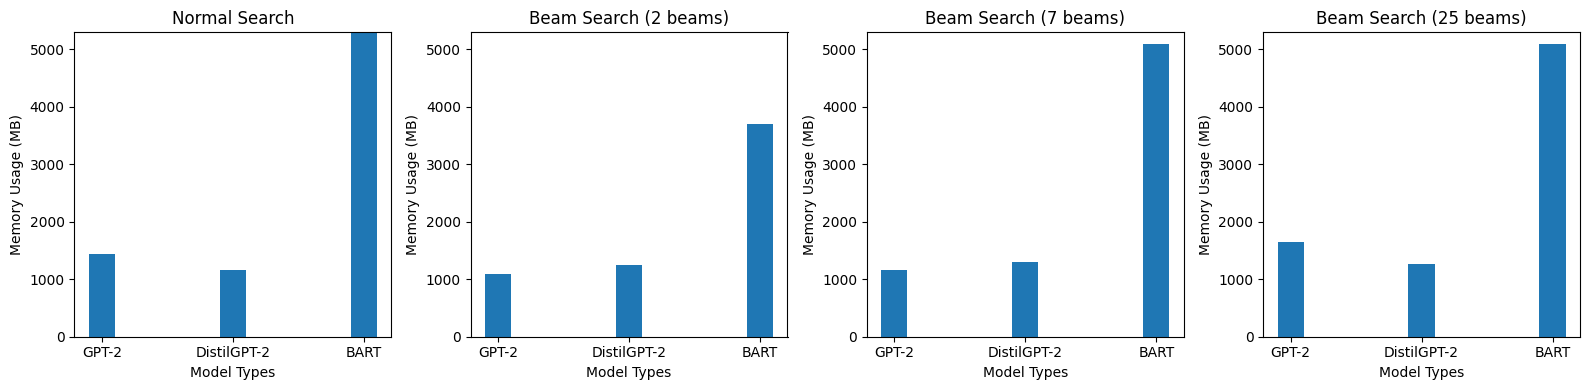

Memory Usage for GPT2 normal search: 1429.86MB
Memory Usage for DistilGPT2 normal search: 1159.23MB
Memory Usage for BART normal search: 5291.6MB

Memory Usage for GPT2 two beam search: 1088.73MB
Memory Usage for DistilGPT2 two beam search: 1253.41MB
Memory Usage for BART two beam search: 3696.82MB

Memory Usage for GPT2 seven beam search: 1156.76MB
Memory Usage for DistilGPT2 seven beam search: 1300.39MB
Memory Usage for BART seven beam search: 5081.9MB

Memory Usage for GPT2 twenty five beam search: 1638.77MB
Memory Usage for DistilGPT2 twenty five beam search: 1262.12MB
Memory Usage for BART twenty five beam search: 5087.56MB


In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for demonstration
model_types = ['GPT-2', 'DistilGPT-2', 'BART']
values = np.array([[gpt2_mNormal, gpt2_m2, gpt2_m7, gpt2_m25], [distilgpt2_mNormal, distilgpt2_m2, distilgpt2_m7, distilgpt2_m25], [bart_mNormal, bart_m2, bart_m7, bart_m25]])

# Setting up positions for bars
bar_width = 0.2
bar_positions = np.arange(len(model_types))

# Define different labels for each graph
labels_list = ['Normal Search', 'Beam Search (2 beams)', 'Beam Search (7 beams)', 'Beam Search (25 beams)']

# Transpose the values array to match the correct shape
graph_values = values.T.tolist()

# Calculate the maximum value among all data points
max_value = np.max(values)

# Create a figure with a single row and four columns
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

# Plotting each bar graph
for i, ax in enumerate(axs):
    ax.bar(bar_positions, graph_values[i], bar_width, label=labels_list[i])
    ax.set_xlabel('Model Types')
    ax.set_ylabel('Memory Usage (MB)')
    ax.set_title(labels_list[i])

    # Adding x-axis ticks and labels
    ax.set_xticks(bar_positions)
    ax.set_xticklabels(model_types)

    # Set a common y-axis range
    ax.set_ylim(0, max_value)

    # Adding legend
    #ax.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

print(f"Memory Usage for GPT2 normal search: {gpt2_mNormal}MB")
print(f"Memory Usage for DistilGPT2 normal search: {distilgpt2_mNormal}MB")
print(f"Memory Usage for BART normal search: {bart_mNormal}MB")

print("")
print(f"Memory Usage for GPT2 two beam search: {gpt2_m2}MB")
print(f"Memory Usage for DistilGPT2 two beam search: {distilgpt2_m2}MB")
print(f"Memory Usage for BART two beam search: {bart_m2}MB")

print("")
print(f"Memory Usage for GPT2 seven beam search: {gpt2_m7}MB")
print(f"Memory Usage for DistilGPT2 seven beam search: {distilgpt2_m7}MB")
print(f"Memory Usage for BART seven beam search: {bart_m7}MB")

print("")
print(f"Memory Usage for GPT2 twenty five beam search: {gpt2_m25}MB")
print(f"Memory Usage for DistilGPT2 twenty five beam search: {distilgpt2_m25}MB")
print(f"Memory Usage for BART twenty five beam search: {bart_m25}MB")


# <b>Machine Translation with MarianMT (French)</b>

<h3><b>Languge Translation to French using two beams</b><h3>

In [21]:
import time
from transformers import MarianMTModel, MarianTokenizer
from memory_profiler import memory_usage

model_name = "Helsinki-NLP/opus-mt-en-fr"  # English to French translation
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

input_text = '''
Computers have revolutionized the way we live and work.
The first electronic computer, ENIAC, was massive, weighing nearly 30 tons.
Today's computers are exponentially smaller and more powerful. Moore's Law, formulated by Gordon Moore,
predicted the doubling of transistors on a microchip every two years, driving rapid advancements.
The binary system, the fundamental language of computers, uses 0s and 1s to represent information.
'''

input_ids = tokenizer(input_text, return_tensors="pt").input_ids

# Function for language translation to french using two beams search
def translate_text_MarianMTFrench_twoBeam():
    output = model.generate(
    input_ids,
    max_length=100,
    num_beams=2,  # Number of beams for beam search
    early_stopping=True
    )
    translated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return translated_text

# Testing for language translation to french using MarianMT model with two beams
# Measure response time
start_time = time.time()
# Generate text using beam search
translated_text_MarianMTFrench_twoBeam = translate_text_MarianMTFrench_twoBeam()
end_time = time.time()
response_time_MarianMTFrench_twoBeam = end_time - start_time
# Measure memory usage
memory_used_MarianMTFrench_twoBeam = memory_usage(translate_text_MarianMTFrench_twoBeam)

# Print results for french language translation with MarianMT  model using two beam
print("Translated Text (MarianMT French translation with Beam Search using two beam):", translated_text_MarianMTFrench_twoBeam)
print(f"Response Time: {response_time_MarianMTFrench_twoBeam:.2f} seconds")
print(f"Memory Usage: {max(memory_used_MarianMTFrench_twoBeam):.2f} MB")

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


Translated Text (MarianMT French translation with Beam Search using two beam): Les ordinateurs ont révolutionné notre façon de vivre et de travailler. Le premier ordinateur électronique, ENIAC, était massif, pesant près de 30 tonnes. Les ordinateurs d'aujourd'hui sont exponentiellement plus petits et plus puissants. La loi de Moore, formulée par Gordon Moore, prédit le doublement des transistors sur une puce tous les deux ans, conduisant à des avancées rapides.
Response Time: 4.30 seconds
Memory Usage: 5084.70 MB


<h3><b>Languge Translation to French using seven beams</b><h3>

In [22]:
import time
from transformers import MarianMTModel, MarianTokenizer
from memory_profiler import memory_usage

model_name = "Helsinki-NLP/opus-mt-en-fr"  # English to French translation
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

input_text = '''
Computers have revolutionized the way we live and work.
The first electronic computer, ENIAC, was massive, weighing nearly 30 tons.
Today's computers are exponentially smaller and more powerful. Moore's Law, formulated by Gordon Moore,
predicted the doubling of transistors on a microchip every two years, driving rapid advancements.
The binary system, the fundamental language of computers, uses 0s and 1s to represent information.
'''

input_ids = tokenizer(input_text, return_tensors="pt").input_ids

# Function for language translation to french using seven beams search
def translate_text_MarianMTFrench_sevenBeam():
    output = model.generate(
    input_ids,
    max_length=100,
    num_beams=7,  # Number of beams for beam search
    early_stopping=True
    )
    translated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return translated_text

# Testing for language translation to french using MarianMT model with seven beams
# Measure response time
start_time = time.time()
# Generate text using beam search
translated_text_MarianMTFrench_sevenBeam = translate_text_MarianMTFrench_sevenBeam()
end_time = time.time()
response_time_MarianMTFrench_sevenBeam = end_time - start_time
# Measure memory usage
memory_used_MarianMTFrench_sevenBeam = memory_usage(translate_text_MarianMTFrench_sevenBeam)

# Print results for french language translation with MarianMT  model using seven beam
print("Translated Text (MarianMT French translation with Beam Search using seven beam):", translated_text_MarianMTFrench_sevenBeam)
print(f"Response Time: {response_time_MarianMTFrench_sevenBeam:.2f} seconds")
print(f"Memory Usage: {max(memory_used_MarianMTFrench_sevenBeam):.2f} MB")

Translated Text (MarianMT French translation with Beam Search using seven beam): Les ordinateurs ont révolutionné la façon dont nous vivons et travaillons. Le premier ordinateur électronique, ENIAC, était massif, pesant près de 30 tonnes. Les ordinateurs d'aujourd'hui sont exponentiellement plus petits et plus puissants. La loi de Moore, formulée par Gordon Moore, prédit le doublement des transistors sur une puce tous les deux ans, conduisant à des avancées rapides.
Response Time: 6.45 seconds
Memory Usage: 5084.83 MB


<h3><b>Languge Translation to French using twenty-five beams</b><h3>

In [23]:
import time
from transformers import MarianMTModel, MarianTokenizer
from memory_profiler import memory_usage

model_name = "Helsinki-NLP/opus-mt-en-fr"  # English to French translation
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

input_text = '''
Computers have revolutionized the way we live and work.
The first electronic computer, ENIAC, was massive, weighing nearly 30 tons.
Today's computers are exponentially smaller and more powerful. Moore's Law, formulated by Gordon Moore,
predicted the doubling of transistors on a microchip every two years, driving rapid advancements.
The binary system, the fundamental language of computers, uses 0s and 1s to represent information.
'''

input_ids = tokenizer(input_text, return_tensors="pt").input_ids

# Function for language translation to french using seven beams search
def translate_text_MarianMTFrench_twentyFiveBeam():
    output = model.generate(
    input_ids,
    max_length=100,
    num_beams=25,  # Number of beams for beam search
    early_stopping=True
    )
    translated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return translated_text

# Testing for language translation to french using MarianMT model with twenty Five beams
# Measure response time
start_time = time.time()
# Generate text using beam search
translated_text_MarianMTFrench_twentyFiveBeam = translate_text_MarianMTFrench_twentyFiveBeam()
end_time = time.time()
response_time_MarianMTFrench_twentyFiveBeam = end_time - start_time
# Measure memory usage
memory_used_MarianMTFrench_twentyFiveBeam = memory_usage(translate_text_MarianMTFrench_twentyFiveBeam)

# Print results for french language translation with MarianMT  model using seven beam
print("Translated Text (MarianMT French translation with Beam Search using twenty Five beam):", translated_text_MarianMTFrench_twentyFiveBeam)
print(f"Response Time: {response_time_MarianMTFrench_twentyFiveBeam:.2f} seconds")
print(f"Memory Usage: {max(memory_used_MarianMTFrench_twentyFiveBeam):.2f} MB")

Translated Text (MarianMT French translation with Beam Search using twenty Five beam): Les ordinateurs ont révolutionné la façon dont nous vivons et travaillons. Le premier ordinateur électronique, ENIAC, était massif, pesant près de 30 tonnes. Les ordinateurs d'aujourd'hui sont exponentiellement plus petits et plus puissants. La loi de Moore, formulée par Gordon Moore, prédit le doublement des transistors sur une puce tous les deux ans, conduisant à des avancées rapides. Le système binaire, le langage fondamental des ordinateurs, utilise 0s et 1s
Response Time: 14.84 seconds
Memory Usage: 5084.83 MB


<h3><b>Languge Translation to French normal search</b><h3>

In [24]:
import time
from transformers import MarianMTModel, MarianTokenizer
from memory_profiler import memory_usage

# Define the model and tokenizer
model_name = "Helsinki-NLP/opus-mt-en-fr"  # English to French translation
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

# Input text
input_text = '''
Computers have revolutionized the way we live and work.
The first electronic computer, ENIAC, was massive, weighing nearly 30 tons.
Today's computers are exponentially smaller and more powerful. Moore's Law, formulated by Gordon Moore,
predicted the doubling of transistors on a microchip every two years, driving rapid advancements.
The binary system, the fundamental language of computers, uses 0s and 1s to represent information.
'''

# Tokenize the input text
input_ids = tokenizer.encode(input_text, return_tensors="pt")

# Function for language translation to french using seven beams search
def translate_text_MarianMTFrench_normalSearch():
    output = model.generate(
    input_ids,
    max_length=100,
    )
    translated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return translated_text

# Testing for language translation to french using MarianMT model with twenty Five beams
# Measure response time
start_time = time.time()
# Generate text using beam search
translated_text_MarianMTFrench_normalSearch = translate_text_MarianMTFrench_normalSearch()
end_time = time.time()
response_time_MarianMTFrench_normalSearch = end_time - start_time
# Measure memory usage
memory_used_MarianMTFrench_normalSearch = memory_usage(translate_text_MarianMTFrench_normalSearch)

# Print results for french language translation with MarianMT  model using normal search
print("Translated Text (MarianMT French translation using normal search):", translated_text_MarianMTFrench_normalSearch)
print(f"Response Time: {response_time_MarianMTFrench_normalSearch:.2f} seconds")
print(f"Memory Usage: {max(memory_used_MarianMTFrench_normalSearch):.2f} MB")

Translated Text (MarianMT French translation using normal search): Les ordinateurs ont révolutionné la façon dont nous vivons et travaillons. Le premier ordinateur électronique, ENIAC, était massif, pesant près de 30 tonnes. Les ordinateurs d'aujourd'hui sont exponentiellement plus petits et plus puissants. La loi de Moore, formulée par Gordon Moore, prédit le doublement des transistors sur une puce tous les deux ans, conduisant à des avancées rapides. Le système binaire, le langage fondamental des ordinateurs, utilise 0s et 1s
Response Time: 5.33 seconds
Memory Usage: 5084.83 MB


# <b>Machine Translation with MarianMT (Bahasa Indonesia)</b>

<h3><b>Languge Translation to Indonesian using two beams</b><h3>

In [25]:
import time
from transformers import MarianMTModel, MarianTokenizer
from memory_profiler import memory_usage

model_name = "Helsinki-NLP/opus-mt-en-id"  # English to Indonesian translation
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

input_text = '''
Computers have revolutionized the way we live and work.
The first electronic computer, ENIAC, was massive, weighing nearly 30 tons.
Today's computers are exponentially smaller and more powerful. Moore's Law, formulated by Gordon Moore,
predicted the doubling of transistors on a microchip every two years, driving rapid advancements.
The binary system, the fundamental language of computers, uses 0s and 1s to represent information.
'''

input_ids = tokenizer(input_text, return_tensors="pt").input_ids

# Function for language translation to Indonesian using two beams search
def translate_text_MarianMTIndonesian_twoBeam():
    output = model.generate(
    input_ids,
    max_length=100,
    num_beams=2,  # Number of beams for beam search
    early_stopping=True
    )
    translated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return translated_text

# Testing for language translation to Indonesian using MarianMT model with two beams
# Measure response time
start_time = time.time()
# Generate text using beam search
translated_text_MarianMTIndonesian_twoBeam = translate_text_MarianMTIndonesian_twoBeam()
end_time = time.time()
response_time_MarianMTIndonesian_twoBeam = end_time - start_time
# Measure memory usage
memory_used_MarianMTIndonesian_twoBeam = memory_usage(translate_text_MarianMTIndonesian_twoBeam)

# Print results for Indonesian language translation with MarianMT  model using two beam
print("Translated Text (MarianMT Indonesian translation with Beam Search using two beam):", translated_text_MarianMTIndonesian_twoBeam)
print(f"Response Time: {response_time_MarianMTIndonesian_twoBeam:.2f} seconds")
print(f"Memory Usage: {max(memory_used_MarianMTIndonesian_twoBeam):.2f} MB")

Translated Text (MarianMT Indonesian translation with Beam Search using two beam): Komputer telah merevolusi cara kita hidup dan bekerja komputer elektronik pertama, ENIAC, sangat besar, beratnya hampir 30 ton. komputer hari ini sangat kecil dan lebih kuat. menurut Hukum Moore, dirumuskan oleh Gordon Moore, memperkirakan dua kali lipat transistor pada microchip setiap dua tahun, mendorong kemajuan pesat. sistem biner, bahasa dasar komputer, menggunakan 0s dan 1s untuk mewakili informasi.
Response Time: 5.86 seconds
Memory Usage: 5084.87 MB


<h3><b>Languge Translation to Indonesian using seven beams</b><h3>

In [26]:
import time
from transformers import MarianMTModel, MarianTokenizer
from memory_profiler import memory_usage

model_name = "Helsinki-NLP/opus-mt-en-id"  # English to French translation
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

input_text = '''
Computers have revolutionized the way we live and work.
The first electronic computer, ENIAC, was massive, weighing nearly 30 tons.
Today's computers are exponentially smaller and more powerful. Moore's Law, formulated by Gordon Moore,
predicted the doubling of transistors on a microchip every two years, driving rapid advancements.
The binary system, the fundamental language of computers, uses 0s and 1s to represent information.
'''

input_ids = tokenizer(input_text, return_tensors="pt").input_ids

# Function for language translation to Indonesian using two beams search
def translate_text_MarianMTIndonesian_sevenBeam():
    output = model.generate(
    input_ids,
    max_length=100,
    num_beams=7,  # Number of beams for beam search
    early_stopping=True
    )
    translated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return translated_text

# Testing for language translation to Indonesian using MarianMT model with two beams
# Measure response time
start_time = time.time()
# Generate text using beam search
translated_text_MarianMTIndonesian_sevenBeam = translate_text_MarianMTIndonesian_sevenBeam()
end_time = time.time()
response_time_MarianMTIndonesian_sevenBeam = end_time - start_time
# Measure memory usage
memory_used_MarianMTIndonesian_sevenBeam = memory_usage(translate_text_MarianMTIndonesian_sevenBeam)

# Print results for Indonesian language translation with MarianMT  model using seven Beams
print("Translated Text (MarianMT Indonesian translation with Beam Search using seven Beams):", translated_text_MarianMTIndonesian_sevenBeam)
print(f"Response Time: {response_time_MarianMTIndonesian_sevenBeam:.2f} seconds")
print(f"Memory Usage: {max(memory_used_MarianMTIndonesian_sevenBeam):.2f} MB")

Translated Text (MarianMT Indonesian translation with Beam Search using seven Beams): komputer telah merevolusi cara kita hidup dan bekerja komputer elektronik pertama, ENIAC, sangat besar, dengan berat hampir 30 ton komputer hari ini secara eksponensial lebih kecil dan lebih kuat, Hukum Moore, dirumuskan oleh Gordon Moore, memperkirakan dua kali lipat transistor pada microchip setiap dua tahun, mendorong kemajuan cepat sistem biner, bahasa dasar komputer, menggunakan 0s dan 1s untuk mewakili informasi.
Response Time: 6.37 seconds
Memory Usage: 5084.90 MB


<h3><b>Languge Translation to Indonesian using twenty-five beams</b><h3>

In [27]:
import time
from transformers import MarianMTModel, MarianTokenizer
from memory_profiler import memory_usage

model_name = "Helsinki-NLP/opus-mt-en-id"  # English to Indonesian translation
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

input_text = '''
Computers have revolutionized the way we live and work.
The first electronic computer, ENIAC, was massive, weighing nearly 30 tons.
Today's computers are exponentially smaller and more powerful. Moore's Law, formulated by Gordon Moore,
predicted the doubling of transistors on a microchip every two years, driving rapid advancements.
The binary system, the fundamental language of computers, uses 0s and 1s to represent information.
'''

input_ids = tokenizer(input_text, return_tensors="pt").input_ids

# Function for language translation to french using two beams search
def translate_text_MarianMTIndonesian_twentyFiveBeam():
    output = model.generate(
    input_ids,
    max_length=100,
    num_beams=25,  # Number of beams for beam search
    early_stopping=True
    )
    translated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return translated_text

# Testing for language translation to Indonesian using MarianMT model with two beams
# Measure response time
start_time = time.time()
# Generate text using beam search
translated_text_MarianMTIndonesian_twentyFiveBeam = translate_text_MarianMTIndonesian_twentyFiveBeam()
end_time = time.time()
response_time_MarianMTIndonesian_twentyFiveBeam = end_time - start_time
# Measure memory usage
memory_used_MarianMTIndonesian_twentyFiveBeam = memory_usage(translate_text_MarianMTIndonesian_twentyFiveBeam)

# Print results for Indonesian language translation with MarianMT  model using twenty Five Beams
print("Translated Text (MarianMT Indonesian translation with Beam Search using twenty Five Beams):", translated_text_MarianMTIndonesian_twentyFiveBeam)
print(f"Response Time: {response_time_MarianMTIndonesian_twentyFiveBeam:.2f} seconds")
print(f"Memory Usage: {max(memory_used_MarianMTIndonesian_twentyFiveBeam):.2f} MB")

Translated Text (MarianMT Indonesian translation with Beam Search using twenty Five Beams): Komputer telah merevolusi cara kita hidup dan bekerja. komputer elektronik pertama, ENIAC, sangat besar, beratnya hampir 30 ton. komputer hari ini secara eksponensial lebih kecil dan lebih kuat. hukum Moore, dirumuskan oleh Gordon Moore, meramalkan dua kali lipat transistor pada microchip setiap dua tahun, mendorong kemajuan cepat. sistem biner, bahasa dasar komputer, menggunakan 0s dan 1s untuk mewakili informasi.
Response Time: 12.55 seconds
Memory Usage: 5084.91 MB


<h3><b>Languge Translation to Indonesian using normal search</b><h3>

In [28]:
import time
from transformers import MarianMTModel, MarianTokenizer
from memory_profiler import memory_usage

model_name = "Helsinki-NLP/opus-mt-en-id"  # English to Indonesian translation
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

input_text = '''
Computers have revolutionized the way we live and work.
The first electronic computer, ENIAC, was massive, weighing nearly 30 tons.
Today's computers are exponentially smaller and more powerful. Moore's Law, formulated by Gordon Moore,
predicted the doubling of transistors on a microchip every two years, driving rapid advancements.
The binary system, the fundamental language of computers, uses 0s and 1s to represent information.
'''

input_ids = tokenizer(input_text, return_tensors="pt").input_ids

# Function for language translation to french using two beams search
def translate_text_MarianMTIndonesian_normalSearch():
    output = model.generate(
    input_ids,
    max_length=100,
    )
    translated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return translated_text

# Testing for language translation to Indonesian using MarianMT model with two beams
# Measure response time
start_time = time.time()
# Generate text using beam search
translated_text_MarianMTIndonesian_normalSearch = translate_text_MarianMTIndonesian_normalSearch()
end_time = time.time()
response_time_MarianMTIndonesian_normalSearch = end_time - start_time
# Measure memory usage
memory_used_MarianMTIndonesian_normalSearch = memory_usage(translate_text_MarianMTIndonesian_normalSearch)

# Print results for Indonesian language translation with MarianMT  model using normal search
print("Translated Text (MarianMT Indonesian translation with Beam Search using normal search):", translated_text_MarianMTIndonesian_normalSearch)
print(f"Response Time: {response_time_MarianMTIndonesian_normalSearch:.2f} seconds")
print(f"Memory Usage: {max(memory_used_MarianMTIndonesian_normalSearch):.2f} MB")

Translated Text (MarianMT Indonesian translation with Beam Search using normal search): komputer telah merevolusi cara kita hidup dan bekerja komputer elektronik pertama, ENIAC, sangat besar, dengan berat hampir 30 ton komputer hari ini secara eksponensial lebih kecil dan lebih kuat, Hukum Moore, dirumuskan oleh Gordon Moore, memperkirakan dua kali lipat transistor pada microchip setiap dua tahun, mendorong kemajuan cepat sistem biner, bahasa dasar komputer, menggunakan 0s dan 1s untuk mewakili informasi.
Response Time: 5.65 seconds
Memory Usage: 5084.92 MB


# <b>Machine Translation with MarianMT (Chinese)</b>

<h3><b>Languge Translation to Chinese using two beams</b><h3>

In [29]:
import time
from transformers import MarianMTModel, MarianTokenizer
from memory_profiler import memory_usage

model_name = "Helsinki-NLP/opus-mt-en-zh"  # English to Chinese translation
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

input_text = '''
Computers have revolutionized the way we live and work.
The first electronic computer, ENIAC, was massive, weighing nearly 30 tons.
Today's computers are exponentially smaller and more powerful. Moore's Law, formulated by Gordon Moore,
predicted the doubling of transistors on a microchip every two years, driving rapid advancements.
The binary system, the fundamental language of computers, uses 0s and 1s to represent information.
'''

input_ids = tokenizer(input_text, return_tensors="pt").input_ids

# Function for language translation to Chinese using two beams search
def translate_text_MarianMTChinese_twoBeam():
    output = model.generate(
    input_ids,
    max_length=100,
    num_beams=2,  # Number of beams for beam search
    early_stopping=True
    )
    translated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return translated_text

# Testing for language translation to Chinese using MarianMT model with two beams
# Measure response time
start_time = time.time()
# Generate text using beam search
translated_text_MarianMTChinese_twoBeam = translate_text_MarianMTChinese_twoBeam()
end_time = time.time()
response_time_MarianMTChinese_twoBeam = end_time - start_time
# Measure memory usage
memory_used_MarianMTChinese_twoBeam = memory_usage(translate_text_MarianMTChinese_twoBeam)

# Print results for Chinese language translation with MarianMT  model using two beam
print("Translated Text (MarianMT Chinese translation with Beam Search using two beam):", translated_text_MarianMTChinese_twoBeam)
print(f"Response Time: {response_time_MarianMTChinese_twoBeam:.2f} seconds")
print(f"Memory Usage: {max(memory_used_MarianMTChinese_twoBeam):.2f} MB")

Translated Text (MarianMT Chinese translation with Beam Search using two beam): 计算机已经改变了我们的生活和工作方式。第一台电子计算机,即ENIAC,规模庞大,重量近30吨。今天的计算机是指数化的,规模较小,实力也更大。戈登·摩尔制定的摩尔法律预测,每两年在微晶片上将晶体管翻一番,这能推动快速的进步。二元系统,计算机的基本语言,用0和1来代表信息。
Response Time: 6.61 seconds
Memory Usage: 5084.93 MB


<h3><b>Languge Translation to Chinese using seven beams</b><h3>

In [30]:
import time
from transformers import MarianMTModel, MarianTokenizer
from memory_profiler import memory_usage

model_name = "Helsinki-NLP/opus-mt-en-zh"  # English to Indonesian translation
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

input_text = '''
Computers have revolutionized the way we live and work.
The first electronic computer, ENIAC, was massive, weighing nearly 30 tons.
Today's computers are exponentially smaller and more powerful. Moore's Law, formulated by Gordon Moore,
predicted the doubling of transistors on a microchip every two years, driving rapid advancements.
The binary system, the fundamental language of computers, uses 0s and 1s to represent information.
'''

input_ids = tokenizer(input_text, return_tensors="pt").input_ids

# Function for language translation to Chinese using seven beams search
def translate_text_MarianMTChinese_sevenBeam():
    output = model.generate(
    input_ids,
    max_length=100,
    num_beams=7,  # Number of beams for beam search
    early_stopping=True
    )
    translated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return translated_text

# Testing for language translation to Chinese using MarianMT model with seven beams
# Measure response time
start_time = time.time()
# Generate text using beam search
translated_text_MarianMTChinese_sevenBeam = translate_text_MarianMTChinese_sevenBeam()
end_time = time.time()
response_time_MarianMTChinese_sevenBeam = end_time - start_time
# Measure memory usage
memory_used_MarianMTChinese_sevenBeam = memory_usage(translate_text_MarianMTChinese_sevenBeam)

# Print results for Chinese language translation with MarianMT  model using two beam
print("Translated Text (MarianMT Chinese translation with Beam Search using seven beam):", translated_text_MarianMTChinese_twoBeam)
print(f"Response Time: {response_time_MarianMTChinese_sevenBeam:.2f} seconds")
print(f"Memory Usage: {max(memory_used_MarianMTChinese_sevenBeam):.2f} MB")

Translated Text (MarianMT Chinese translation with Beam Search using seven beam): 计算机已经改变了我们的生活和工作方式。第一台电子计算机,即ENIAC,规模庞大,重量近30吨。今天的计算机是指数化的,规模较小,实力也更大。戈登·摩尔制定的摩尔法律预测,每两年在微晶片上将晶体管翻一番,这能推动快速的进步。二元系统,计算机的基本语言,用0和1来代表信息。
Response Time: 9.38 seconds
Memory Usage: 5084.95 MB


<h3><b>Languge Translation to Chinese using twenty-five beams</b><h3>

In [31]:
import time
from transformers import MarianMTModel, MarianTokenizer
from memory_profiler import memory_usage

model_name = "Helsinki-NLP/opus-mt-en-zh"  # English to Indonesian translation
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

input_text = '''
Computers have revolutionized the way we live and work.
The first electronic computer, ENIAC, was massive, weighing nearly 30 tons.
Today's computers are exponentially smaller and more powerful. Moore's Law, formulated by Gordon Moore,
predicted the doubling of transistors on a microchip every two years, driving rapid advancements.
The binary system, the fundamental language of computers, uses 0s and 1s to represent information.
'''

input_ids = tokenizer(input_text, return_tensors="pt").input_ids

# Function for language translation to Chinese using seven beams search
def translate_text_MarianMTChinese_twentyFiveBeam():
    output = model.generate(
    input_ids,
    max_length=100,
    num_beams=25,  # Number of beams for beam search
    early_stopping=True
    )
    translated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return translated_text

# Testing for language translation to Chinese using MarianMT model with twenty Five beams
# Measure response time
start_time = time.time()
# Generate text using beam search
translated_text_MarianMTChinese_twentyFiveBeam = translate_text_MarianMTChinese_twentyFiveBeam()
end_time = time.time()
response_time_MarianMTChinese_twentyFiveBeam = end_time - start_time
# Measure memory usage
memory_used_MarianMTChinese_twentyFiveBeam = memory_usage(translate_text_MarianMTChinese_twentyFiveBeam)

# Print results for Chinese language translation with MarianMT  model using two beam
print("Translated Text (MarianMT Chinese translation with Beam Search using twenty Five beam):", translated_text_MarianMTChinese_twentyFiveBeam)
print(f"Response Time: {response_time_MarianMTChinese_twentyFiveBeam:.2f} seconds")
print(f"Memory Usage: {max(memory_used_MarianMTChinese_twentyFiveBeam):.2f} MB")

Translated Text (MarianMT Chinese translation with Beam Search using twenty Five beam): 计算机使我们的生活和工作方式发生了革命性的变化。第一台电子计算机ENIAC(ENIAC)规模庞大,重量近30吨。今天的计算机成倍变小,威力更大。戈登·摩尔(Gordon Moore)制定的《摩尔法 》 ( Moore Law)预测,小芯片上的晶体管每两年翻一番,推动快速进步。 二元系统,计算机的基本语言,使用0和
Response Time: 15.30 seconds
Memory Usage: 5084.95 MB


<h3><b>Languge Translation to Chinese using normal search</b><h3>

In [32]:
import time
from transformers import MarianMTModel, MarianTokenizer
from memory_profiler import memory_usage

model_name = "Helsinki-NLP/opus-mt-en-zh"  # English to Chinese translation
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

input_text = '''
Computers have revolutionized the way we live and work.
The first electronic computer, ENIAC, was massive, weighing nearly 30 tons.
Today's computers are exponentially smaller and more powerful. Moore's Law, formulated by Gordon Moore,
predicted the doubling of transistors on a microchip every two years, driving rapid advancements.
The binary system, the fundamental language of computers, uses 0s and 1s to represent information.
'''

input_ids = tokenizer(input_text, return_tensors="pt").input_ids

# Function for language translation to french using two beams search
def translate_text_MarianMTChinese_normalSearch():
    output = model.generate(
    input_ids,
    max_length=100,
    )
    translated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return translated_text

# Testing for language translation to Chinese using MarianMT model with two beams
# Measure response time
start_time = time.time()
# Generate text using beam search
translated_text_MarianMTChinese_normalSearch = translate_text_MarianMTChinese_normalSearch()
end_time = time.time()
response_time_MarianMTChinese_normalSearch = end_time - start_time
# Measure memory usage
memory_used_MarianMTChinese_normalSearch = memory_usage(translate_text_MarianMTChinese_normalSearch)

# Print results for Chinese language translation with MarianMT  model using normal search
print("Translated Text (MarianMT Chinese translation with Beam Search using normal search):", translated_text_MarianMTChinese_normalSearch)
print(f"Response Time: {response_time_MarianMTChinese_normalSearch:.2f} seconds")
print(f"Memory Usage: {max(memory_used_MarianMTChinese_normalSearch):.2f} MB")

Translated Text (MarianMT Chinese translation with Beam Search using normal search): 计算机改变了我们的生活和工作方式。第一台电子计算机ENIAC(ENIAC)规模庞大,重量近30吨。今天的计算机指数性小,实力强。戈登·摩尔(Gordon Moore)制定的《摩尔法》预测,小芯片上的晶体管每两年翻一番,推动快速进步。二元系统,计算机的基本语言,使用0和1来代表信息。
Response Time: 6.31 seconds
Memory Usage: 5084.95 MB


# <b>Response Time and Memory Usage of Machine Translation Of French,Bahasa Indonesia And Chinese</b>

<h3><b>Response Time and Memory Usage for MarianMT French translation</b><h3>

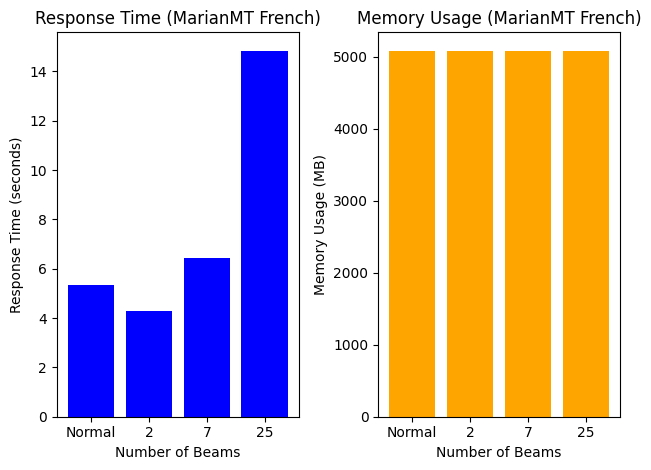

In [33]:
import matplotlib.pyplot as plt

# put the memory usage of using one beam to float variable
marianMTFrench_m2 = float(f"{max(memory_used_MarianMTFrench_twoBeam):.2f}")

# put the memory usage of using seven beams to float variable
marianMTFrench_m7 = float(f"{max(memory_used_MarianMTFrench_sevenBeam):.2f}")

# put the memory usage of using twenty-five beam to float variable
marianMTFrench_m25 = float(f"{max(memory_used_MarianMTFrench_twentyFiveBeam):.2f}")

# put the memory usage of normal search to float variable
marianMTFrench_mNormal = float(f"{max(memory_used_MarianMTFrench_normalSearch):.2f}")

# Sample data for the first graph
num_beams_1 = ["Normal","2","7","25"]
response_time = [response_time_MarianMTFrench_normalSearch,response_time_MarianMTFrench_twoBeam,response_time_MarianMTFrench_sevenBeam,response_time_MarianMTFrench_twentyFiveBeam]  # in seconds

# Sample data for the second graph
num_beams_2 = ["Normal","2","7","25"]
memory_usage = [marianMTFrench_mNormal,marianMTFrench_m2,marianMTFrench_m7,marianMTFrench_m25]  # in mb

# Create two subplots side by side
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.bar(num_beams_1, response_time, color='blue')
plt.xlabel('Number of Beams')
plt.ylabel('Response Time (seconds)')
plt.title('Response Time (MarianMT French)')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.bar(num_beams_2, memory_usage, color='orange')
plt.xlabel('Number of Beams')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage (MarianMT French)')

# Adjust layout for better visualization
plt.tight_layout()

# Display the graphs
plt.show()

<h3><b>Response Time and Memory Usage for MarianMT Bahasa Indonesia translation</b><h3>

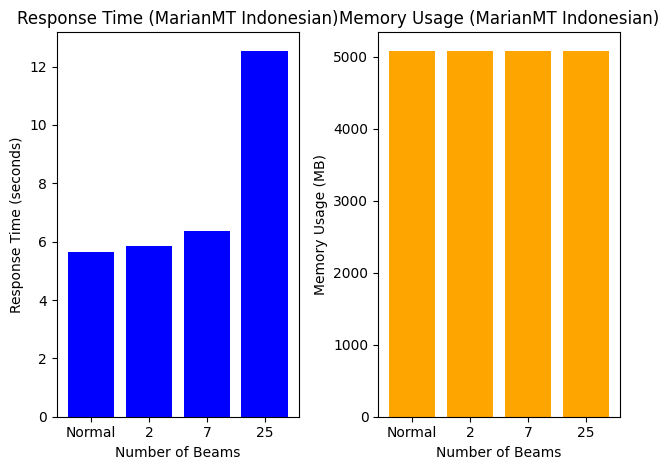

In [34]:
import matplotlib.pyplot as plt

# put the memory usage of using one beam to float variable
marianMTIndonesian_m2 = float(f"{max(memory_used_MarianMTIndonesian_twoBeam):.2f}")

# put the memory usage of using seven beams to float variable
marianMTIndonesian_m7 = float(f"{max(memory_used_MarianMTIndonesian_sevenBeam):.2f}")

# put the memory usage of using twenty-five beam to float variable
marianMTIndonesian_m25 = float(f"{max(memory_used_MarianMTIndonesian_twentyFiveBeam):.2f}")

# put the memory usage of normal search to float variable
marianMTIndonesian_mNormal = float(f"{max(memory_used_MarianMTIndonesian_normalSearch):.2f}")

# Sample data for the first graph
num_beams_1 = ["Normal","2","7","25"]
response_time = [response_time_MarianMTIndonesian_normalSearch,response_time_MarianMTIndonesian_twoBeam,response_time_MarianMTIndonesian_sevenBeam,response_time_MarianMTIndonesian_twentyFiveBeam]  # in seconds

# Sample data for the second graph
num_beams_2 = ["Normal","2","7","25"]
memory_usage = [marianMTIndonesian_mNormal,marianMTIndonesian_m2,marianMTIndonesian_m7,marianMTIndonesian_m25]  # in mb

# Create two subplots side by side
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.bar(num_beams_1, response_time, color='blue')
plt.xlabel('Number of Beams')
plt.ylabel('Response Time (seconds)')
plt.title('Response Time (MarianMT Indonesian)')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.bar(num_beams_2, memory_usage, color='orange')
plt.xlabel('Number of Beams')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage (MarianMT Indonesian)')

# Adjust layout for better visualization
plt.tight_layout()

# Display the graphs
plt.show()

<h3><b>Response Time and Memory Usage for MarianMT Chinese translation</b><h3>

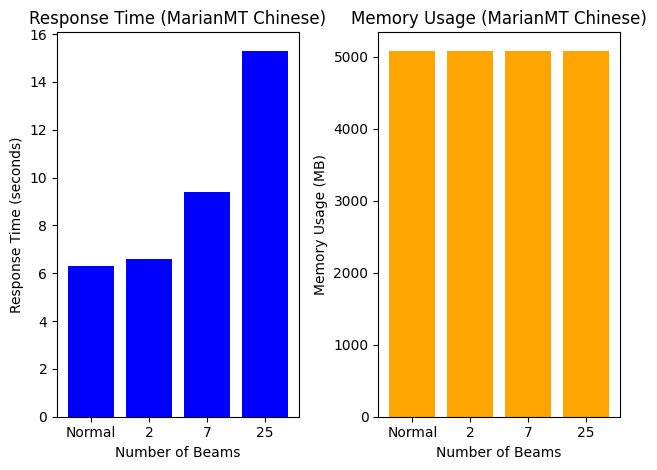

In [35]:
import matplotlib.pyplot as plt

# put the memory usage of using one beam to float variable
marianMTChinese_m2 = float(f"{max(memory_used_MarianMTChinese_twoBeam):.2f}")

# put the memory usage of using seven beams to float variable
marianMTChinese_m7 = float(f"{max(memory_used_MarianMTChinese_sevenBeam):.2f}")

# put the memory usage of using twenty-five beam to float variable
marianMTChinese_m25 = float(f"{max(memory_used_MarianMTChinese_twentyFiveBeam):.2f}")

# put the memory usage of normal search to float variable
marianMTChinese_mNormal = float(f"{max(memory_used_MarianMTChinese_normalSearch):.2f}")

# Sample data for the first graph
num_beams_1 = ["Normal","2","7","25"]
response_time = [response_time_MarianMTChinese_normalSearch,response_time_MarianMTChinese_twoBeam,response_time_MarianMTChinese_sevenBeam,response_time_MarianMTChinese_twentyFiveBeam]  # in seconds

# Sample data for the second graph
num_beams_2 = ["Normal","2","7","25"]
memory_usage = [marianMTChinese_mNormal,marianMTChinese_m2,marianMTChinese_m7,marianMTChinese_m25]  # in mb

# Create two subplots side by side
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.bar(num_beams_1, response_time, color='blue')
plt.xlabel('Number of Beams')
plt.ylabel('Response Time (seconds)')
plt.title('Response Time (MarianMT Chinese)')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.bar(num_beams_2, memory_usage, color='orange')
plt.xlabel('Number of Beams')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage (MarianMT Chinese)')

# Adjust layout for better visualization
plt.tight_layout()

# Display the graphs
plt.show()